# <u> Task 02: </u>

### Create a K-means clustering algorithm to group customers of a retail store based on their purchase history. Dataset : https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [2]:
# Let's import necessary libraries
import pandas as pd
import os
os.environ["MKL_NUM_THREADS"] = "1" # To clear a warning
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [3]:
# Let's load the CSV file into a dataframe
df = pd.read_csv("Mall_Customers.csv")

In [4]:
# Look for missing values in the dataframe
print(f"\nNull count :-\n{df.isna().sum()}")


Null count :-
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


### No NA values detected, so we can skip the data cleaning

In [5]:
# Now, let's scale the values in the dataframe
scaler = MinMaxScaler()
scaler.fit(df[['Age', 'Spending Score (1-100)']])
df[['Age', 'Spending Score (1-100)']] = scaler.transform(df[['Age', 'Spending Score (1-100)']])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.019231,15,0.387755
1,2,Male,0.057692,15,0.816327
2,3,Female,0.038462,16,0.051020
3,4,Female,0.096154,16,0.775510
4,5,Female,0.250000,17,0.397959
...,...,...,...,...,...
195,196,Female,0.326923,120,0.795918
196,197,Female,0.519231,126,0.275510
197,198,Male,0.269231,126,0.744898
198,199,Male,0.269231,137,0.173469


# Using Elbow Plot Method
### Let's use elbow plot method to determine the K value for our data

In [6]:
# Let's check SSE(Sum of Square Errors) for each value of K
sse = []
for k in range(1, 11):
    check_k = KMeans(n_clusters=k, n_init='auto')
    check_k.fit(df[['Age', 'Spending Score (1-100)']])
    # inertia_ is a parameter that gives the value of SSE calculated
    sse.append(check_k.inertia_)

# SSE values calculated the range of K
sse

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

[28.17833784431536,
 13.337690580804235,
 8.743281510740559,
 6.369358666824115,
 5.051510036206073,
 3.762796809327069,
 3.440397325751079,
 2.8650647038639825,
 2.851918230018886,
 2.1042795763582385]

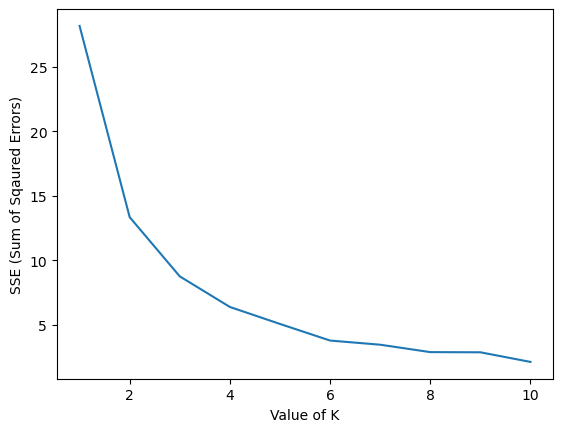

In [12]:
# Now, let's plot SSE values in a chart
plt.xlabel('Value of K')
plt.ylabel('SSE (Sum of Sqaured Errors)')
plt.plot(range(1, 11), sse)

### Let's take K=4, since it the plot gradually decreases from that point

In [15]:
# Now let's apply the KMeans algorithm
km = KMeans(n_clusters=4, n_init='auto')
y_pred = km.fit_predict(df[['Age', 'Spending Score (1-100)']])
y_pred

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 0, 3, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 3, 0, 3, 0, 3, 0,
       2, 0, 2, 0, 3, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 3, 0,
       3, 0, 3, 0, 3, 3, 3, 0, 0, 1, 3, 3, 3, 1, 0, 3, 1, 0, 1, 1, 1, 0,
       3, 1, 0, 3, 1, 3, 1, 1, 1, 0, 3, 3, 0, 3, 1, 3, 1, 3, 0, 3, 1, 0,
       0, 3, 1, 0, 3, 3, 3, 0, 3, 0, 3, 0, 0, 3, 1, 0, 3, 0, 1, 1, 1, 1,
       1, 0, 3, 0, 0, 0, 1, 3, 3, 3, 0, 3, 3, 0, 2, 0, 3, 0, 2, 0, 2, 0,
       3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 3, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [16]:
# The centroids of the 4 clusters
print(f"\nCentroids : {km.cluster_centers_}")
df['cluster'] = y_pred
df


Centroids : [[0.19363395 0.72824302]
 [0.87153846 0.48326531]
 [0.4637746  0.12838159]
 [0.48034188 0.43219955]]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,0.019231,15,0.387755,0
1,2,Male,0.057692,15,0.816327,0
2,3,Female,0.038462,16,0.051020,2
3,4,Female,0.096154,16,0.775510,0
4,5,Female,0.250000,17,0.397959,3
...,...,...,...,...,...,...
195,196,Female,0.326923,120,0.795918,0
196,197,Female,0.519231,126,0.275510,2
197,198,Male,0.269231,126,0.744898,0
198,199,Male,0.269231,137,0.173469,2


## Plot the clustering result in Scatterplot

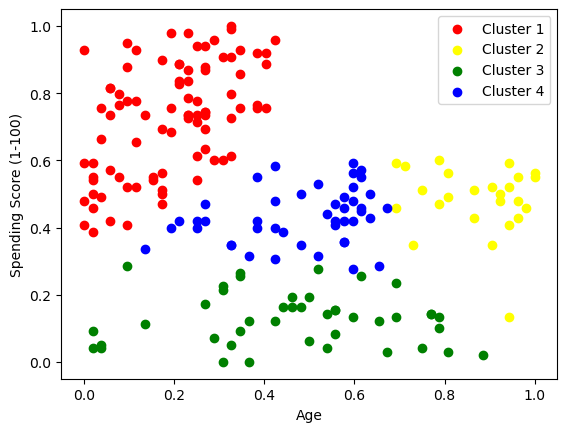

In [18]:
# Grouping clusters based on their centroids and predictions
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]
df4 = df[df['cluster'] == 3]

# Apply different colors to groups to differentiate each group
plt.scatter(df1['Age'], df1['Spending Score (1-100)'], color='red', label='Cluster 1')
plt.scatter(df2['Age'], df2['Spending Score (1-100)'], color='yellow', label='Cluster 2')
plt.scatter(df3['Age'], df3['Spending Score (1-100)'], color='green', label='Cluster 3')
plt.scatter(df4['Age'], df4['Spending Score (1-100)'], color='blue', label='Cluster 4')

# Plot the values
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()

## Customers have been grouped based on their purchase history, using their spending scores